# Week 2 Homework 261 Spring 2016 - Glenn Dunmire

### Question 2.0:

_What is a race condition in the context of parallel computation? Give an example._

A race condition is a situation where the final output of running a program depends on the sequence of events. That is to say, the final value may be different depending on the order in which steps are executed. 

A classic example of a race condition is where two threads want to increase a variable. Ideally one thread would increment the variable, then the other thread would. So if the original value was 0, the final output would be 2. However, if the threads access the variable at the same time or without a lock, the result could be 1. This would be because the threads overwrite each other. So A increments 0 -> 1 but then B overwrites the variable with 1. 

_What is MapReduce? How does it differ from Hadoop?_

Broadly speaking, MapReduce is a programming framework while Hadoop is an implementation of MapReduce. MapReduce is a model for processing large datasets using a parallel, distributed algorithm on a cluster. Hadoop is a specific implementation of MapReduce in Java, which uses a special distributed file system (HDFS) and manages aspects of workflow like distribution and fault tolerance.

_Which programming paradigm is Hadoop based on? Explain and give a simple example in code and show the code running._

Hadoop is based on the paradigm of functional programming. This paradigm is based on the evaluation of mathematical functions and avoids changing state or mutable data. An important point is that a functional language is the concept of a function that can take other functions as an argument, also known as higher-order functions. Map and Reduce are examples of this higher order function. 

In [1]:
#Example of a functional program: using map to print the lengths of strings in a list

states = ["Maryland", "Virginia", "Pennsylvania"]
states_length = map(len, states)
print states_length

[8, 8, 12]


Notice here I am providing the map function with another function, len(). Also here I am not changing the values inside the list nor am I relying on anything other than the input list to produce my output. 

### Question 2.1: 

Given as input: Records of the form '<'integer, “NA”>, where integer is any integer, and “NA” is just the empty string.
Output: sorted key value pairs of the form <'integer, “NA”> in decreasing order; what happens if you have multiple reducers? Do you need additional steps? Explain.

Write code to generate N  random records of the form <'integer, “NA”>. Let N = 10,000.
Write the python Hadoop streaming map-reduce job to perform this sort. Display the top 10 biggest numbers. Display the 10 smallest numbers

In [1]:
#Write a text file of form <integer, "NA">. 
#use the random package to get random numbers
import random

N = 10000 #set size of list of numbers

#I chose to only include a list from 0 to 10000 to make it easy to check if the numbers were sorted properly. 
numbers = random.sample(range(0, 10000), N) #list of numbers at random
output = [] #store output
for number in numbers:
    output.append('<' + str(number) + ', ' + 'NA>') #properly format strings

with open('integer.txt', 'w') as myfile: #write output to a text file
    myfile.write("\n".join(output))

In [2]:
%%writefile mapper.py
#!/usr/bin/python
import sys
# input comes from STDIN (standard input)
for line in sys.stdin:
    line = line[1:] #remove beginning '<' 
    num = line.split()[0] #split on whitespace and only keep number
    num = num[:-1] #remove trailing comma
    print '%s\t%s' % (num, 'NA') #print result to STDOUT for input to reducer

Overwriting mapper.py


In [3]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:

    # parse the input we got from mapper.py
    num, na = line.split('\t')
    
    print '<' + num + ', NA>'

Overwriting reducer.py


In [5]:
#Test mapper and reducer
#!cat integer.txt | python mapper.py | sort -n | python reducer.py

In [6]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 14:47:33 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 14:47:49 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [8]:
#make directory
#!hdfs dfs -mkdir -p /user/dunmireg

16/01/23 13:24:02 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
#add input to hdfs
!hdfs dfs -put integer.txt /user/dunmireg

16/01/25 14:47:51 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D  mapred.text.key.comparator.options=-n \
-mapper mapper.py \
-reducer reducer.py \
-input integer.txt \
-output integerOutput

16/01/25 14:47:56 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 14:47:57 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 14:47:57 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 14:47:57 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 14:47:57 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 14:47:57 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 14:47:57 INFO Configuration.deprecation: mapred.text.key.comparator.options is deprecated. Instead, use mapreduce.partition.keycomparator.options
16/01/25 14:47:57 INFO Configuration.deprecation: mapred.output.key.comparator.class is deprecated. Instead, use mapreduce.job.output.key.comparator.class
16/01/25 14:47:58 INFO mapreduce.JobSubmitter: Su

In [27]:
#show results
#!hdfs dfs -cat /user/dunmireg/integerOutput/part-00000

In [9]:
#move output to local directory
!hadoop fs -copyToLocal /user/dunmireg/integerOutput

16/01/25 14:49:01 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 14:49:02 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 14:49:02 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [10]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/integer.txt #check
!hadoop fs -rmr /user/dunmireg/integerOutput
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 14:49:05 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 14:49:06 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/integer.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 14:49:07 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 14:49:07 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/integerOutput
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 14:49:19 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopping namenodes

In [14]:
#display output
import os

with open(os.path.join('./integerOutput', 'part-00000'), 'r') as myfile: #get appropriate output
    lines = myfile.readlines() #read in lines
    print "Smallest 10:"
    for i in range(10): #get smallest 10, the first 10 numbers
        line = lines[i] #get right line
        line = line[1:] #remove '<'
        num = line.split()[0] #split on whitespace, keeping number
        num = num[:-1] #remove comma
        print num
        
    print "Largest 10"
    for i in range(9990, 10000): #repeat above with different range
        line = lines[i]
        line = line[1:]
        num = line.split()[0]
        num = num[:-1]
        print num

Smallest 10:
0
1
2
3
4
5
6
7
8
9
Largest 10
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999


### Question 2.2
Using the Enron data from HW1 and Hadoop MapReduce streaming, write the mapper/reducer job that  will determine the word count (number of occurrences) of each white-space delimitted token (assume spaces, fullstops, comma as delimiters). Examine the word “assistance” and report its word count results.

 
CROSSCHECK: >grep assistance enronemail_1h.txt|cut -d$'\t' -f4| grep assistance|wc -l    
       8    
       #NOTE  "assistance" occurs on 8 lines but how many times does the token occur? 10 times! This is the number we are looking for!



In [3]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re
WORD_RE = re.compile(r"[\w']+") #regex for string matching

for line in sys.stdin: #for each line
    components = line.split('\t')
    text = " ".join(components[-2:]).strip() #get text of subject and content
    words = re.findall(WORD_RE, text) #match all words
    for word in words:
        print word + '\t' + '1'

Overwriting mapper.py


In [5]:
%%writefile reducer.py
#!/usr/bin/python
#credit to Professor Shanahan for the structure of this reducer
import sys

current_word = None
current_count = 0
word = None

#lines come from standard input
for line in sys.stdin:
    line = line.strip()
    line = line.split('\t')
    word = line[0]
    count = int(line[1])
    
    if current_word == word:
        current_count += count
    else:
        if current_word:
            print '%s\t%s' % (current_word, current_count)
        current_word = word
        current_count = count
#print last line
if current_word == word:
    print '%s\t%s' % (current_word, current_count)

Overwriting reducer.py


In [10]:
#!cat enronemail_1h.txt | python mapper.py | sort | python reducer.py
#confirm assistance = 10

In [11]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 18:17:27 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 18:17:42 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [12]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 18:17:46 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [13]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneWordCount

16/01/25 18:17:50 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 18:17:50 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 18:17:50 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 18:17:50 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 18:17:50 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 18:17:51 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 18:17:51 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1364191356_0001
16/01/25 18:17:51 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 18:17:51 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 18:17:51 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.Fi

In [15]:
#show results
#!hdfs dfs -cat /user/dunmireg/enroneWordCount/part-00000

In [16]:
#move output to local directory
#bin/hadoop fs -copyToLocal /hdfs/source/path /localfs/destination/path
!hadoop fs -copyToLocal /user/dunmireg/enroneWordCount/part-00000

16/01/25 18:18:13 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 18:18:13 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [17]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt 
!hadoop fs -rmr /user/dunmireg/enroneWordCount
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 18:18:21 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 18:18:22 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 18:18:23 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 18:18:23 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneWordCount
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 18:18:35 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopping n

In [21]:
#Rename output file for convenience and print results of assistance
#import os
#os.rename('part-00000', 'wordCount') #only needs to run once

#open file and read contents
with open('wordCount', 'r') as myfile:
    lines = myfile.readlines()
    for line in lines:
        components = line.split('\t') #parse input
        if components[0] == 'assistance': #check if found the right word
            print "Number of times assistance occurs: " + components[1] #print results
            break  #break loop

Number of times assistance occurs: 10



### HW2.2.1
Using Hadoop MapReduce and your wordcount job (from HW2.2) determine the top-10 occurring tokens (most frequent tokens)

In [103]:
%%writefile mapper.py
#!/usr/bin/python
import sys
# input comes from STDIN (standard input)
for line in sys.stdin:
    components = line.split('\t')
    #reverse input, so instead of word, count it now becomes count, word with count serving as key
    #note convert number to an int to remove new line character, then turn to string
    print components[1].rstrip() + '\t' + components[0] #print result to STDOUT for input to reducer

Overwriting mapper.py


In [104]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:

    # parse the input we got from mapper.py
    line = line.split('\t')
    count = line[0]
    word = line[1].rstrip()
    
    #reverse order, relying on hadoop shuffling to get into proper order
    print word + '\t' + count

Overwriting reducer.py


In [105]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 19:11:09 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 19:11:25 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [106]:
#add input to hdfs
!hdfs dfs -put wordCount /user/dunmireg

16/01/25 19:11:44 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [107]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
-D  mapred.text.key.comparator.options=-n \
-mapper mapper.py \
-reducer reducer.py \
-input wordCount \
-output sortedWordCount

16/01/25 19:11:47 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 19:11:47 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 19:11:47 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 19:11:47 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 19:11:47 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 19:11:47 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 19:11:48 INFO Configuration.deprecation: mapred.text.key.comparator.options is deprecated. Instead, use mapreduce.partition.keycomparator.options
16/01/25 19:11:48 INFO Configuration.deprecation: mapred.output.key.comparator.class is deprecated. Instead, use mapreduce.job.output.key.comparator.class
16/01/25 19:11:48 INFO mapreduce.JobSubmitter: Su

In [81]:
#show results
#!hdfs dfs -cat /user/dunmireg/sortedWordCount/part-00000

In [108]:
#move output to local directory
!hadoop fs -copyToLocal /user/dunmireg/sortedWordCount

16/01/25 19:11:57 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 19:11:57 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 19:11:57 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [109]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/wordCount
!hadoop fs -rmr /user/dunmireg/sortedWordCount
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 19:11:59 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 19:12:00 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/wordCount
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 19:12:01 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 19:12:01 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/sortedWordCount
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 19:12:13 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopping namenodes

In [111]:
#Display outputs from results file
import os

with open(os.path.join('./sortedWordCount', 'part-00000'), 'r') as myfile:
    lines = myfile.readlines() #read file
    lines = lines[-10:] #get last 10 lines
    for line in lines:
        print line #print results

for	373

ect	382

your	394

in	417

you	432

a	542

of	566

and	668

to	963

the	1247



### HW2.3. Multinomial NAIVE BAYES with NO Smoothing
Using the Enron data from HW1 and Hadoop MapReduce, write  a mapper/reducer job(s) that
   will both learn  Naive Bayes classifier and classify the Enron email messages using the learnt Naive Bayes classifier. Use all white-space delimitted tokens as independent input variables (assume spaces, fullstops, commas as delimiters). Note: for multinomial Naive Bayes, the Pr(X=“assistance”|Y=SPAM) is calculated as follows:

   the number of times “assistance” occurs in SPAM labeled documents / the number of words in documents labeled SPAM 

   E.g.,   “assistance” occurs 5 times in all of the documents Labeled SPAM, and the length in terms of the number of words in all documents labeled as SPAM (when concatenated) is 1,000. Then Pr(X=“assistance”|Y=SPAM) = 5/1000. Note this is a multinomial estimation of the class conditional for a Naive Bayes Classifier. No smoothing is needed in this HW. Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. Please pay attention to probabilites that are zero! They will need special attention. Count up how many times you need to process a zero probabilty for each class and report. 

   Report the performance of your learnt classifier in terms of misclassifcation error rate of your multinomial Naive Bayes Classifier. Plot a histogram of the posterior probabilities (i.e., Pr(Class|Doc)) for each class over the training set. Summarize what you see. 

   Error Rate = misclassification rate with respect to a provided set (say training set in this case). It is more formally defined here:

Let DF represent the evalution set in the following:
Err(Model, DF) = |{(X, c(X)) ∈ DF : c(X) != Model(x)}|   / |DF|

Where || denotes set cardinality; c(X) denotes the class of the tuple X in DF; and Model(X) denotes the class inferred by the Model “Model”


In [12]:
%%writefile mapper.py
#!/usr/bin/python

import sys
import re
WORD_RE = re.compile(r"[\w']+") #regex for string matching

for line in sys.stdin: #for each line
    components = line.split('\t')
    text = " ".join(components[-2:]).strip() #get text of subject and content
    words = re.findall(WORD_RE, text) #match all words
    for word in words:
        print components[0] + '\t' + word + '\t' + components[1] #print email ID + word + spam flag

Overwriting mapper.py


In [2]:
!chmod a+x mapper.py

In [13]:
%%writefile reducer.py
#!/usr/bin/python
import sys

emails = set() #hold email IDs
words = {} #hold words and associated counts
spam_emails = 0 #how many emails are marked as spam
spam_word_count = 0 #how many words appear in spam
ham_word_count = 0 #how many words appear in ham

for line in sys.stdin:
    components = line.split('\t') #split input
    
    ID = components[0] #put input variables into fields to make easier
    word = components[1]
    spam = int(components[2])
    
    if word not in words.keys(): #if a word is not in the words dictionary, add it and initialize counts to 0
        words[word] = {'spam_count': 0, 'ham_count': 0}
    if ID not in emails: #add email to set to store unique IDs
        emails.add(ID) 
        if spam == 1: #increment spam counter
            spam_emails += 1
        

    if spam == 1: #if the flag if spam, increment the word spam_count value by 1, else do the same for ham
        words[word]['spam_count'] += 1
        spam_word_count += 1
    else:
        words[word]['ham_count'] += 1
        ham_word_count += 1


prior_spam = float(spam_emails)/len(emails) #get prior probabilities
prior_ham = 1-prior_spam

for i, word in words.iteritems(): #calculate conditional probabilities: number of times word appears in class/number of words in class
    word['spam_like'] = float(word['spam_count'])/(spam_word_count)
    word['ham_like'] = float(word['ham_count'])/(ham_word_count)
    

print prior_spam #print priors
print prior_ham
for word in words.keys():
    #Word "\t" spam likelihood '\t' ham likelihood written to file
    print word + '\t' + str(words[word]['spam_like']) + '\t' + str(words[word]['ham_like']) #print each word along with spam and ham conditional probabilities

Overwriting reducer.py


In [4]:
!chmod a+x reducer.py

In [30]:
#Examine output
#!cat enronemail_1h.txt | python mapper.py | python reducer.py

In [14]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 15:10:26 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 15:10:42 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [6]:
#make directory
#!hdfs dfs -mkdir -p /user/dunmireg

16/01/25 00:14:43 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [15]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 15:10:46 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [16]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailCondProbs

16/01/25 15:10:50 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:10:50 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 15:10:50 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 15:10:50 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 15:10:51 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 15:10:51 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 15:10:51 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1213745686_0001
16/01/25 15:10:51 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 15:10:51 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 15:10:51 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.Fi

In [31]:
#show results
#!hdfs dfs -cat /user/dunmireg/enroneEmailCondProbs/part-00000

In [17]:
#move output to local directory
#bin/hadoop fs -copyToLocal /hdfs/source/path /localfs/destination/path
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailCondProbs

16/01/25 15:11:00 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:11:01 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 15:11:01 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [18]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt #check
!hadoop fs -rmr /user/dunmireg/enroneEmailCondProbs
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 15:11:03 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:11:04 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 15:11:05 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:11:06 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailCondProbs
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 15:11:17 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopp

In [24]:
%%writefile mapper.py
#!/usr/bin/python

#The bulk of the classification work happens in the mapper. This will read in the file of conditional probabilities
#and then compute the conditional probability of each word and performs the classification. The classification output
#is then sent to the reducer
import sys
import re
import os 
from math import log
from math import exp

priorSpam = 0 #prior probabilities from file
priorHam = 0
words = {} #dictionary to hold word conditional probabilities

with open(os.path.join('./enroneEmailCondProbs', 'part-00000'), 'r') as myfile: #read file
    lines = myfile.readlines()
    priorSpam = float(lines[0]) #grab prior probabilities
    priorHam = float(lines[1])
    for line in lines[2:]: #parse lines for word with conditional probabilities
        components = line.split('\t')
        words[components[0]] = {'spam_like': float(components[1]), 'ham_like': float(components[2])}
        

WORD_RE = re.compile(r"[\w']+")

spamSkip = 0 #how many times did a skip occur in spam and ham
hamSkip = 0


#NB: I decided to add a large negative number to the probability of each class if the word did not appear
#in that class. If I skipped over the word, the accuracy was 0%. I decided that although this resembles smoothing
#it is still appropriate. If I were to skip a word that means that the conditional probability of a word appearing 
#in the class it did not appear in is 0, which is not true. Instead I set it to a small number. 
#Other methods have been discussed in class but I believe this is the most appropriate. 
for line in sys.stdin:
    components = line.split('\t') #split line
    text = " ".join(components[-2:]).strip() #combine subject and text
    text = re.findall(WORD_RE, text)
    
    spamScore = log(priorSpam) #take logs
    hamScore = log(priorHam)
    for word in text:
        if word in words.keys():
            if float(words[word]['spam_like']) != 0: #this checks if a word has occurred in a class
                spamScore += log(float(words[word]['spam_like'])) #increment probability
            else:
                spamScore += -300
                spamSkip += 1 #skipped over a word in spam
            if float(words[word]['ham_like']) != 0: #repeat procedure for ham
                hamScore += log(float(words[word]['ham_like']))
            else:
                hamScore += -300
                hamSkip += 1
        pred = 0 #predicted class
    if spamScore > hamScore:
        pred = 1
    #output is email ID (key), true flag, predicted class, posterior probabilities (exponentiated) and skip counts
    #When I tried to print the skip counts by themselves there was an error. I do not know the cause of this error 
    #and I know it is inefficient and wrong, but this allows me to at least process it
    print components[0] + '\t' + components[1] + '\t' + str(pred) + '\t' + str(exp(spamScore)) + '\t' + str(exp(hamScore)) + '\t' + str(spamSkip) + '\t' + str(hamSkip)

Overwriting mapper.py


In [12]:
!chmod a+x mapper.py

In [50]:
%%writefile reducer.py
#!/usr/bin/python
import sys

misclassified = 0 #number of emails misclassified
skipSpam = 0 #number of times skip a word in spam
skipHam = 0

for line in sys.stdin:
    components = line.split('\t') #parse intput
    if int(components[1]) != int(components[2]): #if the true classification and the predicted do not agree, increment
            misclassified += 1
    skipSpam = int(components[5])
    skipHam = int(components[6])
    print line #print results
#print output
print "Misclassified: " + str(misclassified) + " which means this has an accuracy of " + str(100-misclassified) + "%"
print "Skipped " + str(skipSpam) + " words in spam"
print "Skipped " + str(skipHam) + " words in ham"

Overwriting reducer.py


In [14]:
!chmod a+x reducer.py

In [52]:
#check results
#!cat enronemail_1h.txt | python mapper.py | python reducer.py

In [53]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 15:34:07 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 15:34:23 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [ ]:
#make directory
#!hdfs dfs -mkdir -p /user/dunmireg

In [54]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 15:34:27 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [55]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailClassificationNoSmoothing

16/01/25 15:34:31 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:34:31 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 15:34:31 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 15:34:31 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 15:34:31 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 15:34:31 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 15:34:32 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local687702657_0001
16/01/25 15:34:32 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 15:34:32 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 15:34:32 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.Fil

In [49]:
#!hdfs dfs -cat /user/dunmireg/enroneEmailClassificationNoSmoothing/part-00000

In [56]:
#move output to local directory - makes easier to process for analysis
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailClassificationNoSmoothing

16/01/25 15:34:42 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:34:43 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 15:34:43 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [57]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt #check
!hadoop fs -rmr /user/dunmireg/enroneEmailClassificationNoSmoothing
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 15:34:45 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:34:45 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 15:34:46 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 15:34:47 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailClassificationNoSmoothing
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 15:34:58 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where 

In [58]:
#Display outputs from results file
import os

with open(os.path.join('./enroneEmailClassificationNoSmoothing', 'part-00000'), 'r') as myfile:
    lines = myfile.readlines() #read file
    lines = lines[-3:] #get last 3 lines
    for line in lines:
        print line #print results


Misclassified: 0 which means this has an accuracy of 100%	

Skipped 4961 words in spam	

Skipped 5694 words in ham	



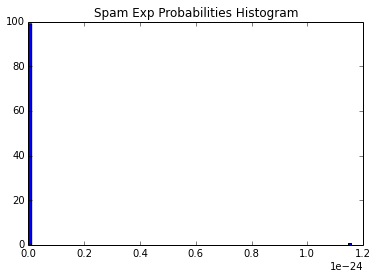

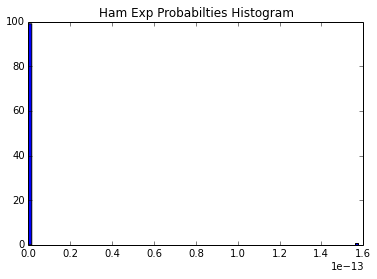

In [83]:
%matplotlib inline
#Make histogram
import os
import matplotlib.pyplot as plt

spam_probs = [] #list of spam probabilities
ham_probs = [] #list of ham probabilities
with open(os.path.join('./enroneEmailClassificationNoSmoothing', 'part-00000'), 'r') as myfile: #read file
    lines = myfile.readlines() 
    for line in lines[:-3]: #exclude last 3 lines which have results
        components = line.split('\t')
        if len(line) != 2: #I believe I have too many text components and a newline character is getting introduced and some whitespace
            #This is an outstanding error I was not able to resolve but I can parse using the logic above
            spam_probs.append(float(components[3]))
            ham_probs.append(float(components[4]))

s = plt.figure(1)
plt.hist(spam_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Spam Exp Probabilities Histogram")

h = plt.figure(2)
plt.hist(ham_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Ham Exp Probabilties Histogram")
plt.show()

### HW2.4 

Repeat HW2.3 with the following modification: use Laplace plus-one smoothing. Compare the misclassifcation error rates for 2.3 versus 2.4 and explain the differences.

For a quick reference on the construction of the Multinomial NAIVE BAYES classifier that you will code,
please consult the "Document Classification" section of the following wikipedia page:

https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification

OR the original paper by the curators of the Enron email data:

http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf

In [5]:
%%writefile mapper.py
#!/usr/bin/python

import sys
import re
WORD_RE = re.compile(r"[\w']+") #regex for string matching

for line in sys.stdin:
    components = line.split('\t') #split input file
    text = " ".join(components[-2:]).strip() #combine to produce subject and content together
    words = re.findall(WORD_RE, text)
    for word in words:
        print components[0] + '\t' + word + '\t' + components[1] #print email ID, word, spam flag

Overwriting mapper.py


In [10]:
%%writefile reducer.py
#!/usr/bin/python
import sys

emails = set() #hold email IDs
words = {} #hold words and associated counts
spam_emails = 0 #how many emails are marked as spam
spam_word_count = 0 #count of words in spam
ham_word_count = 0 #count of words in ham
vocab = set() #set of unique words in all text

for line in sys.stdin:
    components = line.split('\t')
    
    ID = components[0] #parse components to appropriate variables
    word = components[1]
    spam = int(components[2])
    
    if word not in words.keys():
        words[word] = {'spam_count': 0, 'ham_count': 0} #add word to dictionary if not there already
        vocab.add(word) #add word to vocab
    if ID not in emails:
        emails.add(ID)
        if spam == 1:
            spam_emails += 1 #increment spam emails counter
        

    if spam == 1:
        words[word]['spam_count'] += 1 #if email is spam, increment spam counter by 1
        spam_word_count += 1
    else:
        words[word]['ham_count'] += 1 #repeat for ham
        ham_word_count += 1


prior_spam = float(spam_emails)/len(emails) #get prior probabilities
prior_ham = 1-prior_spam

for i, word in words.iteritems():
    #This calculation uses a laplace smoother, +1 to numerator and + vocab in denominator
    #See wikipedia entry
    word['spam_like'] = float(word['spam_count'] + 1)/(spam_word_count + len(vocab)) #calculate conditional probs
    word['ham_like'] = float(word['ham_count'] + 1)/(ham_word_count + len(vocab))
    

print prior_spam
print prior_ham
for word in words.keys():
    #Word "\t" spam likelihood '\t' ham likelihood written to file
    print word + '\t' + str(words[word]['spam_like']) + '\t' + str(words[word]['ham_like']) #print results

Overwriting reducer.py


In [28]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 16:21:55 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 16:22:11 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [4]:
#make directory
#!hdfs dfs -mkdir -p /user/dunmireg

16/01/24 22:46:13 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [29]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 16:22:16 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [30]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailCondProbLaplace

16/01/25 16:22:18 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:22:19 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 16:22:19 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 16:22:19 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 16:22:19 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 16:22:19 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 16:22:20 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1234370154_0001
16/01/25 16:22:20 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 16:22:20 INFO mapreduce.Job: Running job: job_local1234370154_0001
16/01/25 16:22:20 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 16:22:2

In [33]:
#Check output
#!hdfs dfs -cat /user/dunmireg/enroneEmailCondProbLaplace/part-00000

In [31]:
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailCondProbLaplace

16/01/25 16:22:28 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:22:28 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 16:22:28 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [32]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt
!hadoop fs -rmr /user/dunmireg/enroneEmailCondProbLaplace
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:22:30 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:22:31 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:22:32 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:22:33 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailCondProbLaplace
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 16:22:44 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable

In [33]:
%%writefile mapper.py
#!/usr/bin/python

#mapper for classification. This is essentially the same procedure as in 2.3. 
import sys
import re
import os 
from math import log
from math import exp

priorSpam = 0 #hold priors
priorHam = 0
words = {}

with open(os.path.join('./enroneEmailCondProbLaplace', 'part-00000'), 'r') as myfile: #read file
    lines = myfile.readlines()
    priorSpam = float(lines[0]) #parse first lines for priors
    priorHam = float(lines[1])
    for line in lines[2:]:
        components = line.split('\t')
        #add conditional probabilities to words dictionary
        words[components[0]] = {'spam_like': float(components[1]), 'ham_like': float(components[2])}
        

WORD_RE = re.compile(r"[\w']+")

for line in sys.stdin:
    components = line.split('\t')
    text = " ".join(components[-2:]).strip()
    text = re.findall(WORD_RE, text)
    
    spamScore = log(priorSpam)
    hamScore = log(priorHam)
    for word in text:
        if word in words.keys():
            #add conditional probabilities to scores
            spamScore += log(float(words[word]['spam_like']))
            hamScore += log(float(words[word]['ham_like']))
        pred = 0 #assign prediction
    if spamScore > hamScore:
        pred = 1
    #output ID, true classification, prediction, and conditional probabilities
    print components[0] + '\t' + components[1] + '\t' + str(pred) + '\t' + str(exp(spamScore)) + '\t' + str(exp(hamScore))

Overwriting mapper.py


In [34]:
%%writefile reducer.py
#!/usr/bin/python
import sys

misclassified = 0 #count of how many emails are misclassified

for line in sys.stdin:
    components = line.split('\t') #split components
    if int(components[1]) != int(components[2]): #if true classification and prediction don't agree, increment
            misclassified += 1
    print line
#print final output
print "Misclassified: " + str(misclassified) + " which means this has an accuracy of " + str(100-misclassified) + "%"
    

Overwriting reducer.py


In [36]:
#Check code
#!cat enronemail_1h.txt | python mapper.py | python reducer.py

In [37]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 16:23:30 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 16:23:46 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [14]:
#make directory
#!hdfs dfs -mkdir -p /user/dunmireg

16/01/24 22:47:57 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [38]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 16:24:19 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [39]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailClassLaplace

16/01/25 16:24:22 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:24:23 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 16:24:23 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 16:24:23 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 16:24:23 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 16:24:23 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 16:24:23 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local706008687_0001
16/01/25 16:24:24 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 16:24:24 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 16:24:24 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.Fil

In [35]:
#Check output
#!hdfs dfs -cat /user/dunmireg/enroneEmailClassLaplace/part-00000

In [40]:
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailClassLaplace

16/01/25 16:24:33 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:24:34 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 16:24:34 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [41]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt
!hadoop fs -rmr /user/dunmireg/enroneEmailClassLaplace
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:24:36 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:24:36 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:24:37 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:24:38 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailClassLaplace
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 16:24:49 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
St

In [42]:
#Display outputs from results file
import os

with open(os.path.join('./enroneEmailClassLaplace', 'part-00000'), 'r') as myfile:
    lines = myfile.readlines() #read file
    lines = lines[-1:] #get last 3 lines
    for line in lines:
        print line #print results

Misclassified: 0 which means this has an accuracy of 100%	



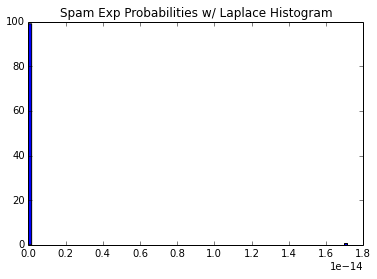

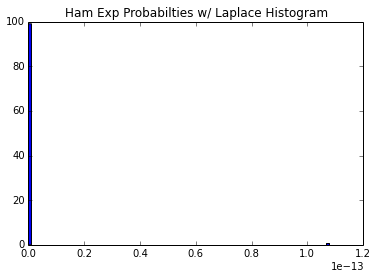

In [44]:
%matplotlib inline
#Make histogram
import os
import matplotlib.pyplot as plt

spam_probs = [] #list of spam probabilities
ham_probs = [] #list of ham probabilities
with open(os.path.join('./enroneEmailClassLaplace', 'part-00000'), 'r') as myfile: #read file
    lines = myfile.readlines() 
    for line in lines[:-1]: #exclude last 3 lines which have results
        components = line.split('\t')
        if len(line) != 2: #I believe I have too many text components and a newline character is getting introduced and some whitespace
            #This is an outstanding error I was not able to resolve but I can parse using the logic above
            spam_probs.append(float(components[3]))
            ham_probs.append(float(components[4]))

s = plt.figure(1)
plt.hist(spam_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Spam Exp Probabilities w/ Laplace Histogram")

h = plt.figure(2)
plt.hist(ham_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Ham Exp Probabilties w/ Laplace Histogram")
plt.show()

### HW2.5. 

Repeat HW2.4. This time when modeling and classification ignore tokens with a frequency of less than three (3) in the training set. How does it affect the misclassifcation error of learnt naive multinomial Bayesian Classifier on the training dataset:

In [18]:
%%writefile mapper.py
#!/usr/bin/python

import sys
import re
WORD_RE = re.compile(r"[\w']+") #regex for word classification

for line in sys.stdin:
    components = line.split('\t') #split inpput
    text = " ".join(components[-2:]).strip() #combine subject and content into text field
    words = re.findall(WORD_RE, text)
    for word in words:
        print components[0] + '\t' + word + '\t' + components[1] #print ID, word, spam flag

Overwriting mapper.py


In [19]:
%%writefile reducer.py
#!/usr/bin/python
import sys

emails = set() #hold email IDs
words = {} #hold words and associated counts
spam_emails = 0 #how many emails are marked as spam
spam_word_count = 0 #how many words in spam
ham_word_count = 0 #how many words in ham
vocab = set() #unique words in all text

for line in sys.stdin:
    components = line.split('\t') #split input
    
    ID = components[0] #put input into appropriate variables
    word = components[1]
    spam = int(components[2])
    
    if word not in words.keys(): #add word to words dictionary, give it spam and ham counts
        words[word] = {'spam_count': 0, 'ham_count': 0}
        vocab.add(word)
    if ID not in emails: 
        emails.add(ID)
        if spam == 1: #increment spam counter
            spam_emails += 1
        

    if spam == 1: #if email is spam, increment the spam counter, otherwise increment ham counter
        words[word]['spam_count'] += 1
        spam_word_count += 1
    else:
        words[word]['ham_count'] += 1
        ham_word_count += 1


prior_spam = float(spam_emails)/len(emails) #get prior probabilities
prior_ham = 1-prior_spam

for word in words.keys(): #remove words that have less than 3 counts from dictionary
    if words[word]['spam_count'] + words[word]['ham_count'] < 3:
        del words[word]

for i, word in words.iteritems(): #use laplace smoother to get conditional probabilities
    word['spam_like'] = float(word['spam_count'] + 1)/(spam_word_count + len(vocab))
    word['ham_like'] = float(word['ham_count'] + 1)/(ham_word_count + len(vocab))
    

print prior_spam #output ham and spam priors
print prior_ham
for word in words.keys():
    #Word "\t" spam likelihood '\t' ham likelihood written to file
    print word + '\t' + str(words[word]['spam_like']) + '\t' + str(words[word]['ham_like']) 

Overwriting reducer.py


In [17]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 16:41:46 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 16:42:01 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [20]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 16:42:11 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [21]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailCondProb3

16/01/25 16:42:14 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:42:15 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 16:42:15 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 16:42:15 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 16:42:15 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 16:42:15 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 16:42:15 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local393621611_0001
16/01/25 16:42:15 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 16:42:15 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 16:42:15 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.Fil

In [22]:
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailCondProb3

16/01/25 16:42:25 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:42:25 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 16:42:25 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [23]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt
!hadoop fs -rmr /user/dunmireg/enroneEmailCondProb3
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:42:27 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:42:28 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:42:29 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:42:30 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailCondProb3
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 16:42:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopp

In [32]:
%%writefile mapper.py
#!/usr/bin/python

#I have placed the mapper here but have not modified it in any way from the previous mapper. It will still
#produce ID + \t + word + \t + true spam flag to send to the reducer. 
import sys
import re
import os 
from math import log
from math import exp

priorSpam = 0 #priors
priorHam = 0
words = {}

with open(os.path.join('./enroneEmailCondProbLaplace', 'part-00000'), 'r') as myfile: #read input file
    lines = myfile.readlines() #parse lines
    priorSpam = float(lines[0]) #get priors
    priorHam = float(lines[1])
    for line in lines[2:]:
        components = line.split('\t') #split remaining lines and add word and likelihoods to dictionary
        words[components[0]] = {'spam_like': float(components[1]), 'ham_like': float(components[2])}
        

WORD_RE = re.compile(r"[\w']+")

for line in sys.stdin: #read input
    components = line.split('\t')
    text = " ".join(components[-2:]).strip() #get subject and content together as text
    text = re.findall(WORD_RE, text)
    
    spamScore = log(priorSpam) #get priors
    hamScore = log(priorHam)
    for word in text:
        if word in words.keys(): #increment scores based on word conditional probabilities
            spamScore += log(float(words[word]['spam_like']))
            hamScore += log(float(words[word]['ham_like']))
        pred = 0 #predicted class
    if spamScore > hamScore:
        pred = 1
    #output ID, spam flag, predicted class, and exponentiated conditional probabilities for document
    print components[0] + '\t' + components[1] + '\t' + str(pred) + '\t' + str(exp(spamScore)) + '\t' + str(exp(hamScore))

Overwriting mapper.py


In [33]:
%%writefile reducer.py
#!/usr/bin/python
import sys

misclassified = 0 #keep track of how many are misclassified

for line in sys.stdin:
    components = line.split('\t')
    if int(components[1]) != int(components[2]):
            misclassified += 1 #if predicted and true flag disagree increment counter
    print line
print "Misclassified: " + str(misclassified) + " which means this has an accuracy of " + str(100-misclassified) + "%"

Overwriting reducer.py


In [30]:
#Check code
#!cat enronemail_1h.txt | python mapper.py | python reducer.py

In [31]:
#Start hadoop yarn
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/start-dfs.sh

starting yarn daemons
starting resourcemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-resourcemanager-Glenns-Air.home.out
localhost: starting nodemanager, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/yarn-dunmireg-nodemanager-Glenns-Air.home.out
16/01/25 16:49:54 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-namenode-Glenns-Air.home.out
localhost: starting datanode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-datanode-Glenns-Air.home.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/Cellar/hadoop/2.7.1/libexec/logs/hadoop-dunmireg-secondarynamenode-Glenns-Air.home.out
16/01/25 16:50:09 WARN util.NativeCodeLoader: Unable to load native-hadoop library for

In [34]:
#add input to hdfs
!hdfs dfs -put enronemail_1h.txt /user/dunmireg

16/01/25 16:50:19 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [35]:
!hadoop jar /usr/local/Cellar/hadoop/2.7.1/libexec/share/hadoop/tools/lib/hadoop-streaming-2.7.1.jar \
-mapper mapper.py \
-reducer reducer.py \
-input enronemail_1h.txt \
-output enroneEmailClass3

16/01/25 16:50:23 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:50:23 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
16/01/25 16:50:23 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
16/01/25 16:50:23 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
16/01/25 16:50:23 INFO mapred.FileInputFormat: Total input paths to process : 1
16/01/25 16:50:24 INFO mapreduce.JobSubmitter: number of splits:1
16/01/25 16:50:24 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local41400190_0001
16/01/25 16:50:24 INFO mapred.LocalJobRunner: OutputCommitter set in config null
16/01/25 16:50:24 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
16/01/25 16:50:24 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.File

In [36]:
!hadoop fs -copyToLocal /user/dunmireg/enroneEmailClass3

16/01/25 16:50:35 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:50:36 WARN hdfs.DFSClient: DFSInputStream has been closed already
16/01/25 16:50:36 WARN hdfs.DFSClient: DFSInputStream has been closed already


In [37]:
#Remove output directory and stop yarn and hdfs
!hadoop fs -rmr /user/dunmireg/enronemail_1h.txt
!hadoop fs -rmr /user/dunmireg/enroneEmailClass3
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2.7.1/sbin/stop-dfs.sh

rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:50:38 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:50:38 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enronemail_1h.txt
rmr: DEPRECATED: Please use 'rm -r' instead.
16/01/25 16:50:39 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/01/25 16:50:40 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/dunmireg/enroneEmailClass3
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
no proxyserver to stop
16/01/25 16:50:52 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Stopping

In [38]:
#Display outputs from results file
import os

with open(os.path.join('./enroneEmailClass3', 'part-00000'), 'r') as myfile:
    lines = myfile.readlines() #read file
    lines = lines[-1:] #get last 3 lines
    for line in lines:
        print line #print results

Misclassified: 0 which means this has an accuracy of 100%	



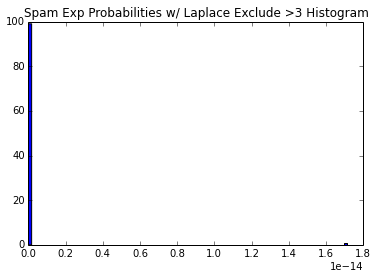

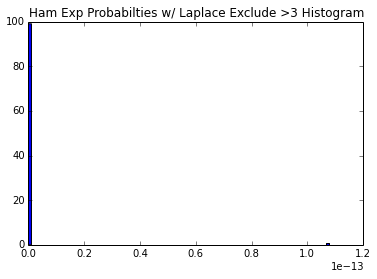

In [39]:
%matplotlib inline
#Make histogram
import os
import matplotlib.pyplot as plt

spam_probs = [] #list of spam probabilities
ham_probs = [] #list of ham probabilities
with open(os.path.join('./enroneEmailClass3', 'part-00000'), 'r') as myfile: #read file
    lines = myfile.readlines() 
    for line in lines[:-1]: #exclude last line which has results
        components = line.split('\t')
        if len(line) != 2: #I believe I have too many text components and a newline character is getting introduced and some whitespace
            #This is an outstanding error I was not able to resolve but I can parse using the logic above
            spam_probs.append(float(components[3]))
            ham_probs.append(float(components[4]))

s = plt.figure(1)
plt.hist(spam_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Spam Exp Probabilities w/ Laplace Exclude >3 Histogram")

h = plt.figure(2)
plt.hist(ham_probs, bins = 100)
plt.xlabel = "Probability"
plt.ylabel = "Frequency"
plt.title("Ham Exp Probabilties w/ Laplace Exclude >3 Histogram")
plt.show()